<a href="https://colab.research.google.com/github/as9786/ML-DLPratice/blob/main/Pytorch/Pytorch(%EC%88%98%EC%A0%951).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

In [108]:
import numpy as np 
import matplotlib.pyplot as plt

In [109]:
np.random.seed(0)

pts = []
labels = []

center_point = np.random.uniform(-8,8,(10,2))

for label, value in enumerate(center_point):
  for _ in range(100):
    pts.append(value + np.random.randn(*value.shape))
    labels.append(label)

In [110]:
pts = np.array(pts)    
labels = np.array(labels)  

pts.shape, labels.shape

((1000, 2), (1000,))

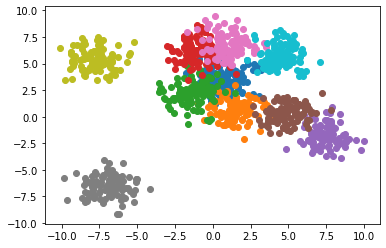

In [111]:
plt.figure()
for idx in range(10):
  mask = idx == labels
  plt.scatter(pts[mask,0],pts[mask,1])
plt.show()

## To torch dataset

In [112]:
import torch
from torch.utils.data import Dataset, DataLoader

In [113]:
torch.__version__

'1.13.0+cu116'

In [114]:
class CustomDataset(Dataset):

  # 객체 생성자
  def __init__(self,pts,labels):
    self.X = pts
    self.y = labels

    # If length of X and y are not equal, raise error
    assert len(self.X) == len(self.y)

  # 길이 반환  
  def __len__(self):
    return len(self.X)

  def __getitem__(self,idx):
    X = torch.tensor(self.X[idx],dtype=torch.float32)
    y= self.y[idx]
    return X,y


assert는 오류를 발생시키는 함수로 특정 조건이 어긋났을 경우 오류를 발생시킨다

Pytorch의 경우에는 모형 생성 시 가중치의 형식이 torch.float32이므로 독립 변수들도 같은 형식으로 맞추어주어야 함

### assert

In [115]:
assert 1 == 1

In [116]:
assert 1==2

AssertionError: ignored

## Holdout

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X_train,X_test,y_train,y_test = train_test_split(pts,labels,test_size=0.3,random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.1,random_state=0)

In [119]:
print('Shapoe of X train : ',X_train.shape)
print('Shapoe of X valid : ',X_valid.shape)
print('Shapoe of X est : ',X_test.shape)

Shapoe of X train :  (700, 2)
Shapoe of X valid :  (270, 2)
Shapoe of X est :  (30, 2)


In [120]:
train_dataset = CustomDataset(X_train, y_train)
valid_dataset = CustomDataset(X_valid, y_valid)
test_dataset = CustomDataset(X_test, y_test)

In [121]:
# Check dataset
print('Length of train dataset : ',len(train_dataset))
print('Shape of X train : ' ,train_dataset.X.shape)

Length of train dataset :  700
Shape of X train :  (700, 2)


In [122]:
train_loader = DataLoader(train_dataset,batch_size=64,shuffle=True)
valid_loader = DataLoader(valid_dataset,batch_size=64)
test_loader = DataLoader(test_dataset,batch_size=32)

In [123]:
next(iter(train_loader))

[tensor([[ 3.9547,  7.1368],
         [ 1.4791,  8.3981],
         [-7.2922,  6.3316],
         [ 7.8890, -1.5535],
         [ 0.6587, -0.7537],
         [ 2.7752,  0.2845],
         [ 1.9690,  3.7600],
         [ 7.1773, -2.7431],
         [ 8.1090, -1.0683],
         [-0.0321,  1.7167],
         [ 1.9247, -0.2750],
         [ 1.5113,  7.3570],
         [ 5.7656,  5.5967],
         [ 1.3043,  3.2715],
         [-6.5786, -6.9153],
         [ 7.4308, -0.2957],
         [ 3.5399,  6.5983],
         [ 2.9443,  4.7796],
         [ 4.6343, -1.0685],
         [10.0130, -2.2690],
         [-0.7748,  6.5980],
         [-5.9769, -6.8781],
         [ 7.8596, -1.6861],
         [ 7.7435, -0.8678],
         [ 7.5802, -0.3015],
         [-2.9639,  1.0311],
         [-1.3075,  2.5286],
         [-0.2290,  7.3506],
         [-1.6904,  0.1329],
         [-1.5311,  6.9134],
         [-8.6818,  5.4233],
         [ 1.0036,  6.2452],
         [ 0.1374,  1.2196],
         [-1.5690,  1.7530],
         [ 2.1

iter는 반복 객체를 만들어주는 함수. iter 함수 사용 시 next 구문으로 data 확인 가능

In [124]:
for x,y in train_loader:
  print(x.shape)
  print(y.shape)
  break

torch.Size([64, 2])
torch.Size([64])


# 모형

In [125]:
import torch.nn as nn
import torch.optim as optim

In [126]:
class MyModel(nn.Module):

  def __init__(self):
    #super().__init__()
    super(MyModel,self).__init__() # nn.Moudled의 속성을 생성자 변수들이 모두 가질 수 있도록 설정
    self.linear = nn.Linear(2,50)
    self.relu = nn.ReLU()
    self.out = nn.Linear(50,10)

    # torch.nn.init.xavier_uniform_(self.linear.weight)

  def forward(self,x):
    x = self.linear(x)
    x = self.relu(x)
    output = self.out(x)
    return output

In [127]:
# 사용가능한 장치 확인
torch.cuda.is_available()

True

True 일 경우 GPU를 사용할 수 있다는 뜻이고, False면 cpu로 연산을 수행한다는 뜻

### Set torch device

In [128]:
if torch.cuda.is_available() == True:
  device = 'cuda'
else:
  device = 'cpu'

device

'cuda'

In [129]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 
device

device(type='cuda')

In [130]:
model = MyModel().to(device)
model

MyModel(
  (linear): Linear(in_features=2, out_features=50, bias=True)
  (relu): ReLU()
  (out): Linear(in_features=50, out_features=10, bias=True)
)

### 모형 요약

In [131]:
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [132]:
from torchinfo import summary
summary(model)

Layer (type:depth-idx)                   Param #
MyModel                                  --
├─Linear: 1-1                            150
├─ReLU: 1-2                              --
├─Linear: 1-3                            510
Total params: 660
Trainable params: 660
Non-trainable params: 0

In [133]:
#손실 함수 및 최적화 함수
optimizer = optim.Adam(model.parameters(),lr = 0.0001)
criterion = nn.CrossEntropyLoss()

# 학습

In [134]:
len(train_loader.dataset)

700

In [135]:
for X,y in train_loader:
  sample_X = X
  sample_y = y
  break

In [136]:
sample_X = X.to(device)
sample_y = y.to(device)

In [137]:
output = model(sample_X)
output

tensor([[-6.6177e-01, -1.5426e+00,  3.6124e-02,  1.7739e+00, -4.2248e-01,
         -2.3030e+00,  3.8797e-01,  9.5968e-01,  6.0918e-01, -2.0350e-02],
        [-2.1998e-01,  7.5619e-01,  1.8532e-01,  2.3148e-01,  1.2391e-01,
         -2.5270e-01, -4.7157e-02, -1.0804e-02,  5.1116e-01, -5.9840e-01],
        [-3.7862e-01,  1.6580e-01,  5.7216e-01,  8.4558e-01, -6.8644e-01,
         -9.5728e-01, -2.1891e-01, -6.8417e-01,  1.6955e+00,  6.8548e-01],
        [-1.0221e+00, -6.2085e-01, -9.7405e-01, -9.0543e-01,  2.4447e-01,
         -2.8434e-01,  5.6707e-01,  2.2825e+00, -2.1679e+00, -2.6754e-01],
        [-3.6199e-01,  6.0989e-01,  5.5936e-01,  3.0351e-01, -1.1692e-01,
         -6.9643e-02, -2.4913e-01, -5.1767e-01,  7.4974e-01,  8.2169e-03],
        [-5.8886e-01, -1.2948e+00,  5.2014e-02,  1.5871e+00, -3.7618e-01,
         -2.0425e+00,  3.0330e-01,  7.2969e-01,  7.4585e-01,  1.8860e-02],
        [-1.0354e+00, -4.2319e-01, -1.1348e+00, -1.1444e+00,  2.7476e-01,
         -1.4159e-01,  7.1948e-0

In [138]:
output[0]

tensor([-0.6618, -1.5426,  0.0361,  1.7739, -0.4225, -2.3030,  0.3880,  0.9597,
         0.6092, -0.0204], device='cuda:0', grad_fn=<SelectBackward0>)

In [139]:
criterion(output,sample_y).item()

2.3240180015563965

In [140]:
def train(model, dataloader, optimizer, loss_fn,epoch):
  # model.train()
  print(f'Epoch : {epoch}')
  size = len(dataloader.dataset)
  total_batch = len(dataloader)
  running_loss = 0
  for batch, (X, y) in enumerate(dataloader): 
    X = X.to(device)
    y = y.to(device)

    output = model(X)
    loss = loss_fn(output, y)

    optimizer.zero_grad() # 이전 경사 값들의 정보를 날림
    loss.backward()
    optimizer.step()

    print(f'Train loss : {loss.item():>7f} [{batch*len(X)}/{size}]')
    running_loss += loss.item()
  print(f'Average Train loss : {running_loss/total_batch}\n')
  return running_loss

In [141]:
for epoch in range(10):
  train(model,train_loader,optimizer,criterion,epoch)

Epoch : 0
Train loss : 2.756764 [0/700]
Train loss : 2.808532 [64/700]
Train loss : 2.484109 [128/700]
Train loss : 2.498271 [192/700]
Train loss : 2.563560 [256/700]
Train loss : 2.681324 [320/700]
Train loss : 2.572083 [384/700]
Train loss : 2.705210 [448/700]
Train loss : 2.516575 [512/700]
Train loss : 2.723630 [576/700]
Train loss : 2.738921 [600/700]
Average Train loss : 2.6408162117004395

Epoch : 1
Train loss : 2.759784 [0/700]
Train loss : 2.444773 [64/700]
Train loss : 2.472838 [128/700]
Train loss : 2.913460 [192/700]
Train loss : 2.568021 [256/700]
Train loss : 2.405498 [320/700]
Train loss : 2.670902 [384/700]
Train loss : 2.676382 [448/700]
Train loss : 2.454322 [512/700]
Train loss : 2.511598 [576/700]
Train loss : 2.419647 [600/700]
Average Train loss : 2.5724749131636186

Epoch : 2
Train loss : 2.498538 [0/700]
Train loss : 2.303638 [64/700]
Train loss : 2.500078 [128/700]
Train loss : 2.724443 [192/700]
Train loss : 2.507537 [256/700]
Train loss : 2.328057 [320/700]
T

In [144]:
output = model(sample_X)

In [145]:
output[0]

tensor([-0.4335, -2.3037,  0.0592,  1.3757, -1.2655, -3.1814,  0.5672,  0.4869,
         1.3174, -0.7061], device='cuda:0', grad_fn=<SelectBackward0>)

In [146]:
torch.argmax(output[0])

tensor(3, device='cuda:0')

In [148]:
y[0]

tensor(8)

In [150]:
output.argmax(1) 

tensor([3, 1, 8, 7, 8, 8, 7, 8, 8, 8, 8, 4, 1, 8, 8, 1, 1, 7, 7, 8, 8, 8, 1, 8,
        8, 1, 1, 8, 7, 8, 8, 8, 8, 8, 8, 1, 1, 8, 1, 7, 8, 1, 1, 1, 8, 8, 7, 7,
        1, 8, 8, 1, 8, 1, 7, 8, 8, 8, 7, 8, 8, 1, 1, 1], device='cuda:0')

In [155]:
output.argmax(1) == sample_y

tensor([False,  True, False,  True, False,  True,  True, False, False,  True,
        False, False,  True, False, False, False, False, False,  True, False,
        False, False, False, False,  True, False, False, False,  True,  True,
        False,  True,  True, False, False, False, False, False, False,  True,
        False,  True,  True, False, False, False,  True,  True, False, False,
        False, False,  True, False,  True, False, False, False,  True, False,
         True,  True, False, False], device='cuda:0')

In [160]:
(output.argmax(1) == sample_y).sum().item()

22

In [171]:
def test(model, dataloader, loss_fn,epoch):
  total_batch = len(dataloader)
  size = len(dataloader.dataset)
  model.eval()
  test_loss, correct = 0, 0
  # 경사 계산 X
  with torch.no_grad():
    
    for X,y in dataloader:
      X = X.to(device)
      y = y.to(device) 

      preds = model(X)
      loss = loss_fn(preds,y)
      correct += (preds.argmax(1) == y).sum().item()
      test_loss += loss.item()
    
    test_loss /= total_batch
    correct /= size

  print(f'Epoch : {epoch} Test Loss : {test_loss}, Test Accuracy : {correct}')

  return test_loss


In [170]:
test(model, valid_loader, criterion,1)

Epoch : 1 Test Loss : 0.8856472253799439, Test Accuracy : 0.7037037037037037


In [168]:
for epoch in range(100):
  train(model,train_loader,optimizer,criterion,epoch)
  test(model, valid_loader, criterion,epoch)

Epoch : 0
Train loss : 2.129727 [0/700]
Train loss : 1.991927 [64/700]
Train loss : 2.211837 [128/700]
Train loss : 2.163576 [192/700]
Train loss : 2.017777 [256/700]
Train loss : 2.048154 [320/700]
Train loss : 2.122459 [384/700]
Train loss : 1.945757 [448/700]
Train loss : 2.156959 [512/700]
Train loss : 1.934529 [576/700]
Train loss : 2.055563 [600/700]
Average Train loss : 2.0707514719529585

Epoch : 0 Test Loss : 2.0785699129104613, Test Accuracy : 0.22592592592592592
Epoch : 1
Train loss : 2.076938 [0/700]
Train loss : 2.066802 [64/700]
Train loss : 2.100272 [128/700]
Train loss : 2.145894 [192/700]
Train loss : 2.028319 [256/700]
Train loss : 2.094425 [320/700]
Train loss : 1.876994 [384/700]
Train loss : 1.987102 [448/700]
Train loss : 1.860853 [512/700]
Train loss : 2.147726 [576/700]
Train loss : 1.871682 [600/700]
Average Train loss : 2.023364381356673

Epoch : 1 Test Loss : 2.029289960861206, Test Accuracy : 0.23333333333333334
Epoch : 2
Train loss : 2.021228 [0/700]
Train 

## 조기 종료

In [172]:
best_loss = 99999
counter = 0
for epoch in range(100):
  train(model,train_loader,optimizer,criterion,epoch)
  current_loss = test(model, valid_loader, criterion,epoch)
  if best_loss >= current_loss:
    best_loss = current_loss
    counter += 1
    if counter == 1:
      break


Epoch : 0
Train loss : 0.886606 [0/700]
Train loss : 0.942702 [64/700]
Train loss : 0.910273 [128/700]
Train loss : 0.976576 [192/700]
Train loss : 0.920570 [256/700]
Train loss : 0.842202 [320/700]
Train loss : 1.056989 [384/700]
Train loss : 0.888512 [448/700]
Train loss : 0.874069 [512/700]
Train loss : 0.920043 [576/700]
Train loss : 1.024636 [600/700]
Average Train loss : 0.9311979521404613

Epoch : 0 Test Loss : 0.8827088952064515, Test Accuracy : 0.7


# 모형 저장

In [173]:
import copy

In [175]:
best_loss = 99999
counter = 0
best_model_weight = copy.deepcopy(model.state_dict())
for epoch in range(100):
  train(model,train_loader,optimizer,criterion,epoch)
  current_loss = test(model, valid_loader, criterion,epoch)
  if best_loss >= current_loss:
    best_loss = current_loss
    counter += 1
    best_model_wts = copy.deepcopy(model.state_dict())
    if counter == 1:
      break


Epoch : 0
Train loss : 0.897579 [0/700]
Train loss : 0.965448 [64/700]
Train loss : 0.903775 [128/700]
Train loss : 0.829314 [192/700]
Train loss : 1.072744 [256/700]
Train loss : 0.902160 [320/700]
Train loss : 0.883274 [384/700]
Train loss : 0.892202 [448/700]
Train loss : 0.938664 [512/700]
Train loss : 1.110027 [576/700]
Train loss : 0.766233 [600/700]
Average Train loss : 0.9237655401229858

Epoch : 0 Test Loss : 0.8768467783927918, Test Accuracy : 0.7037037037037037


In [176]:
best_model_weight

OrderedDict([('linear.weight', tensor([[-0.0010,  0.5596],
                      [ 0.7757,  0.5144],
                      [ 0.5669, -0.4354],
                      [-0.1434, -0.0073],
                      [-0.4750,  0.4301],
                      [ 0.1007, -0.5178],
                      [ 0.3856, -0.5476],
                      [-0.5501,  0.6045],
                      [-0.7784, -0.3684],
                      [ 0.5911, -0.0483],
                      [-0.3847, -0.3516],
                      [ 0.1852,  0.4514],
                      [-0.4671,  0.6305],
                      [-0.6958, -0.0932],
                      [ 0.6549, -0.1369],
                      [ 0.0239, -0.1662],
                      [-0.3578, -0.1628],
                      [-0.6937, -0.2579],
                      [ 0.5996, -0.4211],
                      [ 0.5521,  0.1099],
                      [ 0.7470, -0.3141],
                      [ 0.1953,  0.2552],
                      [-0.7037,  0.7341],
                 

In [177]:
model.load_state_dict(best_model_weight)

<All keys matched successfully>

In [178]:
torch.save(model, 'pytorch_sample.ckpt')

In [179]:
model = torch.load('pytorch_sample.ckpt')